# Problem 1

In [1]:
%pylab inline
import numpy as np
from sklearn.mixture import GMM

Populating the interactive namespace from numpy and matplotlib


[ 12.76498204   0.23501796]
Średnie: [ 2.91134515  4.96711811]
Macierz kowariancji:
[[12, 3], [3, 1]]
Macierz korelacji:
[[ 1.          0.86389387]
 [ 0.86389387  1.        ]]


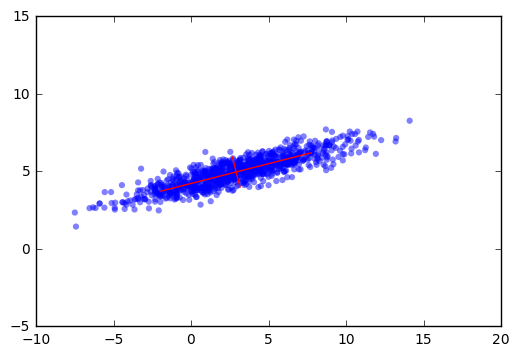

In [2]:
S_X = [[12,3],[3,1]]
D_X, V_X = np.linalg.eig(S_X)
print(D_X)
X = np.random.multivariate_normal([3,5], S_X, 1000)
scatter(X[:,0], X[:,1], edgecolors='none', alpha=0.5)
mean, std = np.mean(X, 0), np.std(X, 0)
print "Średnie:", mean
print "Macierz kowariancji:\n", S_X
print "Macierz korelacji:\n", np.corrcoef(X.T)
axis('equal')
plot([mean[0]-V_X[0][0]*5, mean[0]+V_X[0][0]*5], [mean[1]-V_X[1][0]*5, mean[1]+V_X[1][0]*5], color='r')
plot([mean[0]-V_X[0][1], mean[0]+V_X[0][1]], [mean[1]-V_X[1][1], mean[1]+V_X[1][1]], color='r')

Średnie: [ -1.52988733e-16  -6.90780766e-15]
Macierz kowariancji:
[[ 1.001001    0.86475862]
 [ 0.86475862  1.001001  ]]
Macierz korelacji:
[[ 1.          0.86389387]
 [ 0.86389387  1.        ]]
Wektory własne:
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
Wartośći własne: [ 1.86575962  0.13624238]


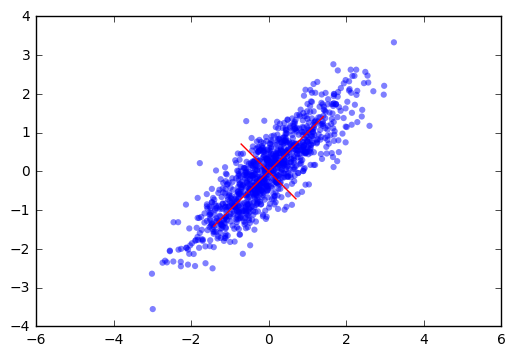

In [3]:
X0 = (X - np.mean(X, 0))/np.std(X, 0)
scatter(X0[:,0], X0[:,1], edgecolors='none', alpha=0.5)
S = np.cov(X0.T)
D, V = np.linalg.eig(S)
idx = D.argsort()[::-1]
D, V = D[idx], V[:, idx]
print "Średnie:", np.mean(X0, 0)
print "Macierz kowariancji:\n", S
print "Macierz korelacji:\n", np.corrcoef(X0.T)
print "Wektory własne:\n", V
print "Wartośći własne:", D
axis('equal')
plot([-V[0][0]*2, V[0][0]*2], [-V[1][0]*2, V[1][0]*2], color='r')
plot([-V[0][1], V[0][1]], [-V[1][1], V[1][1]], color='r')

Średnie: [  3.65718567e-15  -1.28063116e-14]
Macierz kowariancji:
[[  1.00000000e+00  -5.69003192e-17]
 [ -5.69003192e-17   1.00000000e+00]]
Macierz korelacji:
[[  1.00000000e+00  -5.69003192e-17]
 [ -5.69003192e-17   1.00000000e+00]]


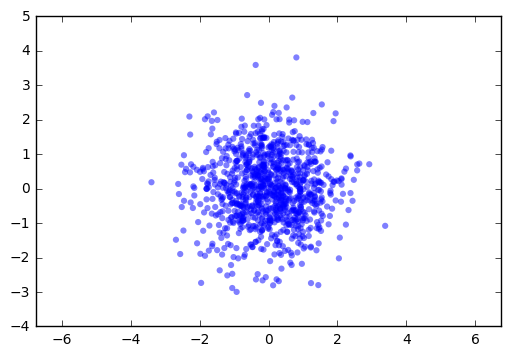

In [4]:
Y = X0.dot(V)/sqrt(D)
print "Średnie:", np.mean(Y, 0)
print "Macierz kowariancji:\n", np.cov(Y.T)
print "Macierz korelacji:\n", np.corrcoef(Y.T)
axis('equal')
scatter(Y[:,0], Y[:,1], edgecolors='none', alpha=0.5)

Średnie: [ 3.15998736  5.05145016]
Macierz kowariancji:
[[ 374.48817262  109.13086206]
 [ 109.13086206   32.06589886]]
Macierz korelacji:
[[ 1.          0.99587957]
 [ 0.99587957  1.        ]]


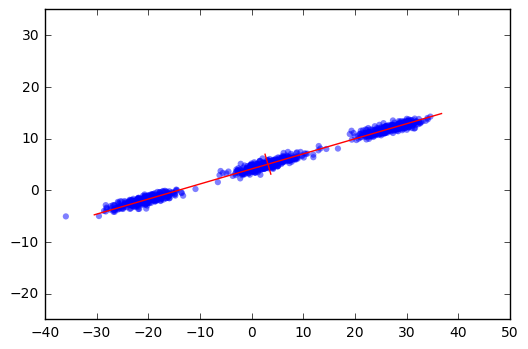

In [5]:
gmm = GMM(n_components=3, covariance_type='tied')
gmm.weights_ = np.array(3*[1./3])
gmm.means_ = np.array([[3,5], [27, 12], [-21, -2]])
gmm.covars_ = np.array(S_X)
gmmX = gmm.sample(1000)
axis('equal')
scatter(gmmX[:,0], gmmX[:,1], edgecolors='none', alpha=0.5)
S_gmmX = np.cov(gmmX.T)
D_gmmX, V_gmmX = np.linalg.eig(S_gmmX)
mean, std = np.mean(gmmX, 0), np.std(gmmX, 0)
print "Średnie:", mean
print "Macierz kowariancji:\n", S_gmmX
print "Macierz korelacji:\n", np.corrcoef(gmmX.T)
axis('equal')
plot([mean[0]-V_gmmX[0][0]*35, mean[0]+V_gmmX[0][0]*35], [mean[1]-V_gmmX[1][0]*35, mean[1]+V_gmmX[1][0]*35], color='r')
plot([mean[0]-V_gmmX[0][1]*2, mean[0]+V_gmmX[0][1]*2], [mean[1]-V_gmmX[1][1]*2, mean[1]+V_gmmX[1][1]*2], color='r')

Średnie: [  1.32338585e-16  -1.01851860e-15]
Macierz kowariancji:
[[ 1.001001    0.99687645]
 [ 0.99687645  1.001001  ]]
Macierz korelacji:
[[ 1.          0.99587957]
 [ 0.99587957  1.        ]]
Wektory własne:
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
Wartośći własne: [ 1.99787745  0.00412455]


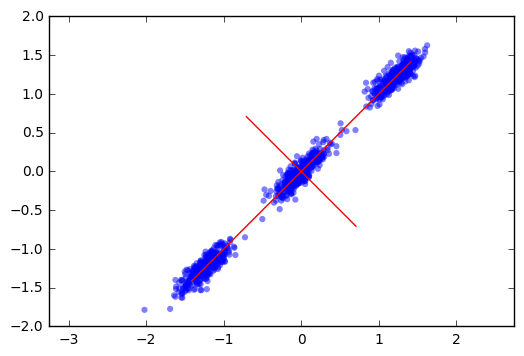

In [6]:
gmmX0 = (gmmX - np.mean(gmmX, 0))/np.std(gmmX, 0)
scatter(gmmX0[:,0], gmmX0[:,1], edgecolors='none', alpha=0.5)
gmmS = np.cov(gmmX0.T)
gmmD, gmmV = np.linalg.eig(gmmS)
idx = gmmD.argsort()[::-1]
gmmD, gmmV = gmmD[idx], gmmV[:, idx]
print "Średnie:", np.mean(gmmX0, 0)
print "Macierz kowariancji:\n", gmmS
print "Macierz korelacji:\n", np.corrcoef(gmmX0.T)
print "Wektory własne:\n", gmmV
print "Wartośći własne:", gmmD
axis('equal')
plot([-gmmV[0][0]*2, gmmV[0][0]*2], [-gmmV[1][0]*2, gmmV[1][0]*2], color='r')
plot([-gmmV[0][1], gmmV[0][1]], [-gmmV[1][1], gmmV[1][1]], color='r')

Średnie: [  4.61186644e-16  -1.21389565e-14]
Macierz kowariancji:
[[  1.00000000e+00  -2.84323782e-15]
 [ -2.84323782e-15   1.00000000e+00]]
Macierz korelacji:
[[  1.00000000e+00  -2.84323782e-15]
 [ -2.84323782e-15   1.00000000e+00]]


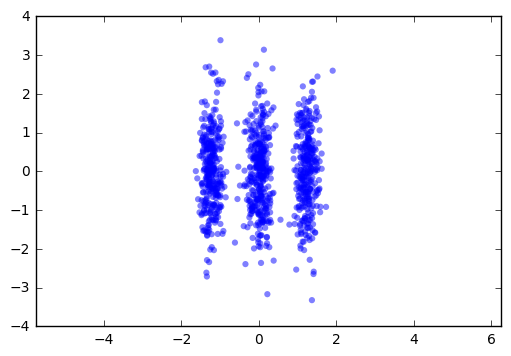

In [7]:
gmmY = gmmX0.dot(gmmV)/sqrt(gmmD)
print "Średnie:", np.mean(gmmY, 0)
print "Macierz kowariancji:\n", np.cov(gmmY.T)
print "Macierz korelacji:\n", np.corrcoef(gmmY.T)
axis('equal')
scatter(gmmY[:,0], gmmY[:,1], edgecolors='none', alpha=0.5)

# Iris

In [8]:
from sklearn import datasets

Macierz kowariancji:
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]
Wektory własne:
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
Wartości własne: [ 2.93035378  0.92740362  0.14834223  0.02074601]


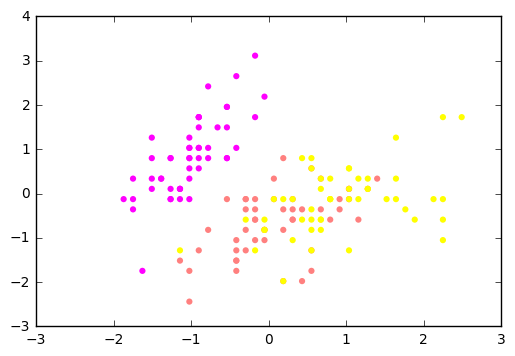

In [9]:
iris = datasets.load_iris()
irises = iris.data
standarized_irises = (irises - np.mean(irises, 0))/np.std(irises, 0)
S = np.cov(standarized_irises.T)
D, V = np.linalg.eig(S)
idx = D.argsort()[::-1]
D, V = D[idx], V[:, idx]
print "Macierz kowariancji:\n", S
print "Wektory własne:\n", V
print "Wartości własne:", D
scatter(standarized_irises[:, 0], standarized_irises[:, 1], edgecolors='none', c=iris.target, cmap='spring')

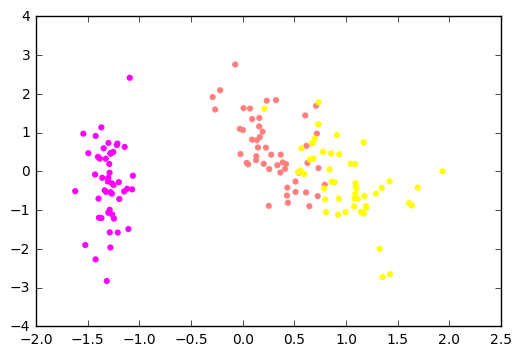

In [10]:
decorrelated_irises = standarized_irises.dot(V)/sqrt(D)
reduced_irises = decorrelated_irises[:, :2]
scatter(reduced_irises[:, 0], reduced_irises[:, 1], edgecolors='none', c=iris.target, cmap='spring')

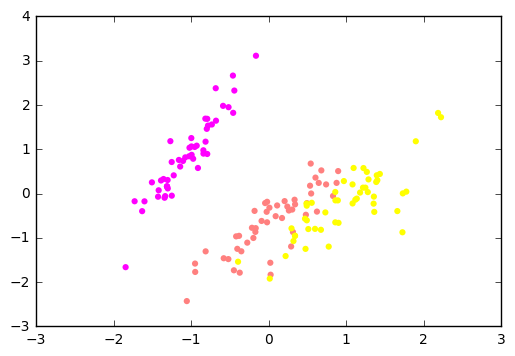

In [11]:
reconstructed_irises = (np.hstack((reduced_irises, np.zeros(reduced_irises.shape)))*(sqrt(D))).dot(np.linalg.inv(V))
scatter(reconstructed_irises[:, 0], reconstructed_irises[:, 1], edgecolors='none', c=iris.target, cmap='spring')

In [12]:
print "Mean error:", ((reconstructed_irises - standarized_irises)**2).sum()/irises.shape[0]
print "Sum of last 2 eigenvalues:", sum(D[-2:])

Mean error: 0.167960985541
Sum of last 2 eigenvalues: 0.169088240477
